In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt

from pandas import read_csv, DataFrame

from base64 import b64decode
from numpy import array, random, uint8, float64, ndarray, asarray, expand_dims, bincount
from PIL import Image
from io import BytesIO

In [30]:
dataset = 'hungry3'
df = DataFrame()
for root, dirs, files in os.walk(f'data/{dataset}/'):
    df = read_csv(f"data/{dataset}/{files[0]}")[['data', 'label']]
    for filename in files[1:]:
        df = df.append(read_csv(f"data/{dataset}/{filename}")[['data', 'label']], ignore_index=True)

In [31]:
df['data'] = [array(Image.open(BytesIO(b64decode(x)))) for x in df['data']]
print(set(df['label']))
df['label'] = [0 if x == 'NOR' else 1 for x in df['label']]
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(2500, 2)

In [32]:
array([array([y[:-1]/255 for y in x]) for x in df['data'][0]])

array([[[0.37647059, 0.68235294, 0.29411765],
        [0.29019608, 0.48627451, 0.18431373],
        [0.10588235, 0.91764706, 0.21176471],
        ...,
        [1.        , 1.        , 1.        ],
        [0.78039216, 0.41960784, 0.84705882],
        [0.58039216, 0.63137255, 0.22352941]],

       [[0.37647059, 0.68235294, 0.29411765],
        [0.29019608, 0.48627451, 0.18431373],
        [0.10588235, 0.91764706, 0.21176471],
        ...,
        [1.        , 1.        , 1.        ],
        [0.78039216, 0.41960784, 0.84705882],
        [0.58039216, 0.63137255, 0.22352941]],

       [[0.37647059, 0.68235294, 0.29411765],
        [0.29019608, 0.48627451, 0.18431373],
        [0.10588235, 0.91764706, 0.21176471],
        ...,
        [1.        , 1.        , 1.        ],
        [0.78039216, 0.41960784, 0.84705882],
        [0.58039216, 0.63137255, 0.22352941]],

       ...,

       [[0.27058824, 0.37254902, 0.31764706],
        [0.1254902 , 0.63529412, 0.64313725],
        [0.43529412, 0

In [33]:
df_reshaped = df.copy()
data = array([array([y[:, :-1]/255 for y in x]) for x in df_reshaped['data']])
labels = array([array([x], dtype=uint8) for x in df_reshaped['label']])

In [34]:
row_split = int(len(df) * 0.8)
train_data = data[0:row_split]
test_data = data[row_split:]
train_labels = labels[0:row_split]
test_labels = labels[row_split:]

In [35]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(2000, 320, 320, 3)
(500, 320, 320, 3)
(2000, 1)
(500, 1)


In [36]:
# # Initialising the CNN
# model = Sequential()

# # Step 1 - Convolution
# model.add(Conv2D(32, (3, 3), input_shape=(320, 320, 3), activation='relu'))

# # Step 2 - Pooling
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a second convolutional layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a third convolutional layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a fourth convolutional layer
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Step 3 - Flattening
# model.add(Flatten())

# # Step 4 - Full connection
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=2, activation='sigmoid'))

# # Compiling the CNN
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(320, 320, 3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(2, activation = 'softmax'))

# THIS WAS BEST SO FAR
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(320, 320 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# model = Sequential([
#     Conv2D(8, 3, padding='same', activation='relu', input_shape=(320, 320 ,3)),
#     MaxPooling2D(),
#     Conv2D(16, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
y_binary_train_labels = to_categorical(train_labels)
y_binary_test_labels = to_categorical(test_labels)

In [39]:
try:
    history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))
except Exception as e:
    print(e)
    history = model.fit(train_data, y_binary_train_labels, epochs=15, 
                    validation_data=(test_data, y_binary_test_labels))

Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 105s 53ms/sample - loss: 0.6046 - accuracy: 0.6965 - val_loss: 0.4009 - val_accuracy: 0.8400
Epoch 2/10
2000/2000 [==============================] - 96s 48ms/sample - loss: 0.3173 - accuracy: 0.8670 - val_loss: 0.2999 - val_accuracy: 0.8920
Epoch 3/10
2000/2000 [==============================] - 111s 55ms/sample - loss: 0.1944 - accuracy: 0.9325 - val_loss: 0.2253 - val_accuracy: 0.9100
Epoch 4/10
2000/2000 [==============================] - 105s 53ms/sample - loss: 0.1208 - accuracy: 0.9535 - val_loss: 0.2565 - val_accuracy: 0.9240
Epoch 5/10
2000/2000 [==============================] - 105s 53ms/sample - loss: 0.0835 - accuracy: 0.9705 - val_loss: 0.2104 - val_accuracy: 0.9420
Epoch 6/10
2000/2000 [==============================] - 106s 53ms/sample - loss: 0.0617 - accuracy: 0.9780 - val_loss: 0.1222 - val_accuracy: 0.9660
Epoch 7/10
2000/2000 [==============================] - 109s

500/1 - 7s - loss: 0.1559 - accuracy: 0.9600


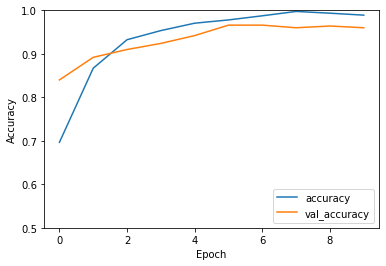

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1]) 
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

In [41]:
print(test_loss)
print(test_acc)

0.21730942928791047
0.96


In [42]:
model.save(f"models/{dataset}/hungry-96VA-21VL.h5")

In [ ]:
model2 = load_model(f"models/{dataset}/temperature-97VA-00VL.h5")

In [ ]:
test_loss, test_acc = model2.evaluate(test_data,  test_labels, verbose=2)
print(test_loss)
print(test_acc)

In [ ]:
model2.summary()

In [ ]:
model.summary()

In [43]:
df['label']

0       0
1       1
2       0
3       1
4       1
       ..
2495    1
2496    1
2497    0
2498    1
2499    0
Name: label, Length: 2500, dtype: int64

In [ ]:

prediction = model2.predict(array([train_data[6]]))[0][0]
prediction

In [ ]:
train_labels[6]

In [ ]:
model2 = load_model("models/hungry/hunger-83VA-52VL.h5")
plot_model(model2, to_file='hunger_model.png')

In [ ]:
model2.summary()